In [56]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

"""
Question 1)  Using mid-prices, find all the arbitrages in butterfly spreads with adjacent strike prices.

Question 2)  Using bid- and ask-quotes, find all the butterfly spread arbitrages.
"""

# Date: 7-Aug-2018
# Maturity: 21-Jun-2019
# Expiration: 318

# Need to convert expiration in days to expiration in years
period = 318/365

# C = S + P - K*exp(-rT)
r = -(0.0244 + 1)
stock = 379.57
forward = 387.73


In [57]:
spread = pd.read_excel('./ButterflyHomework.xlsx', skiprows=12)
# Need to use skiprows=12 to get the proper dataframe formatting

spread.head()

,strike,Vol 8/7,Fitted Vol,Black-Scholes Call,Bid,Mid,Ask
0,55,0.957070,0.693550,326.325944,325.325944,326.325944,327.325944
1,60,0.902117,0.685908,321.378535,320.378535,321.378535,322.378535
2,65,0.851266,0.678353,316.431076,315.431076,316.431076,317.431076
3,70,0.876616,0.670885,311.858668,310.858668,311.858668,312.858668
4,75,0.758869,0.663504,306.536247,305.536247,306.536247,307.536247


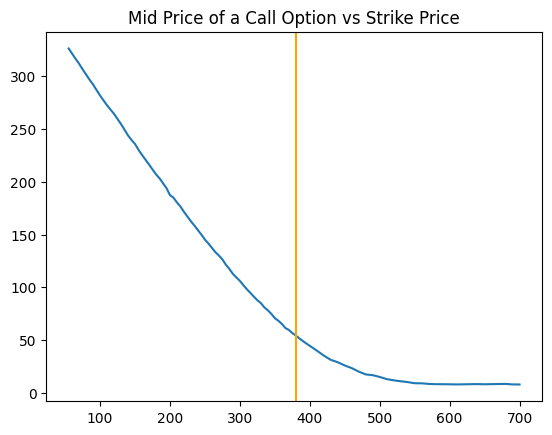

In [58]:
plt.plot(spread['strike'], spread['Mid'])
#plt.plot(spread['strike'], spread['Black-Scholes Call'])
plt.title("Mid Price of a Call Option vs Strike Price")
plt.axvline(x = stock, color = 'orange', label = 'axvline - full height')
plt.show()

# Question 1

There is an arbitrage when the center strike price is 100.0 and the arbitrage is $-5.0
There is an arbitrage when the center strike price is 140.0 and the arbitrage is $5.0
There is an arbitrage when the center strike price is 375.0 and the arbitrage is $0.4300000000000068
There is an arbitrage when the center strike price is 380.0 and the arbitrage is $4.569999999999993


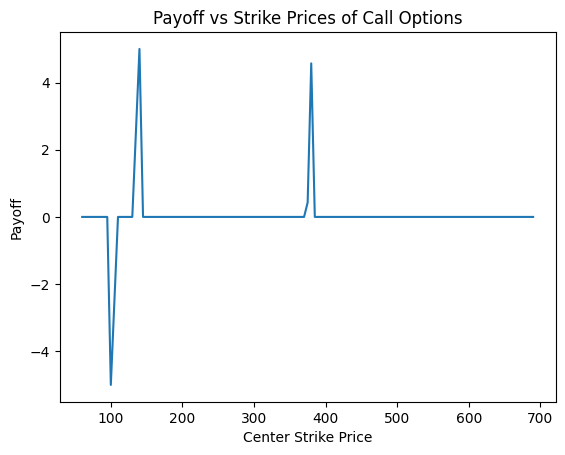

In [59]:
# This function returns the payoff of a call option, as we've learned in class
def payoff(stock, strike):
    return max([0, (stock-strike)])

arr = []
for index, row in spread.iterrows():
    if index > 0 and index < 95:
        market = payoff(stock, spread.loc[index-1]['strike']) - (2*payoff(stock, spread.loc[index]['strike'])) + payoff(stock, spread.loc[index+1]['strike'])
        arr.append(market)
        if market != 0:
            print("There is an arbitrage when the center strike price is " + str(spread.loc[index]['strike']) + " and the arbitrage is $" + str(market))
plt.plot(spread['strike'][1:95], arr)
plt.xlabel("Center Strike Price")
plt.ylabel("Payoff")
plt.title("Payoff vs Strike Prices of Call Options")
plt.show()

In the above diagram and code block, we can see there are 4 places where an arbitrage presents itself. At K = 140, we will buy one call for $135, sell two calls for $140, and buy one call for $145. This occurs twice more when K = $375 and when K = $380.

In the case of K = $100, we see the arbitrage value is negative. This means that we will flip the strategy, or actually sell one call for $95, buy two calls at $100, and sell one call for $105.

# Question 2